In [27]:
import pandas as pd
import numpy as np


In [3]:
df_ex =pd.DataFrame(
    data={
        "height":[147, 150, 153, 158, 163, 165, 168, 178, 173, 175, 178, 180, 183],
        "weight":[49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68],
        "height_2":[110, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183],
        "weight_2":[49, 98, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68],
    }
)
df_ex

,height,weight,height_2,weight_2
0,147,49,110,49
1,150,50,150,98
2,153,51,153,51
3,158,54,158,54
4,163,58,163,58
5,165,59,165,59
6,168,60,168,60
7,178,62,170,62
8,173,63,173,63
9,175,64,175,64


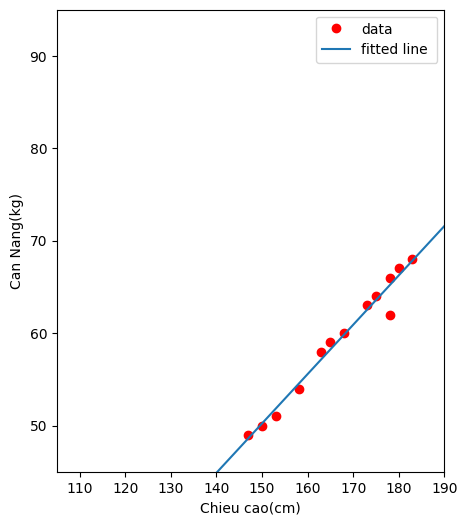

In [4]:
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression

def fit_linear_regression_and_visualize (df: pd.DataFrame, input_col: str, label_col: str):
    # su dung mo hinh quy hoi tuyen tinh
    lin_reg =LinearRegression(fit_intercept=True)
    lin_reg.fit(df[[input_col]],df[label_col])
    w1 = lin_reg.coef_
    w0 = lin_reg.intercept_
    
    # truc quan data

    plt.plot(df[input_col], df[label_col], "ro", label="data")
    plt.axis([105, 190, 45, 75])
    plt.xlabel("Chieu cao(cm)")
    plt.ylabel("Can Nang(kg)")
    plt.ylim(45,95)
    plt.plot([105,190],[w1*105 +w0,w1*190+w0],label="fitted line ")
    plt.legend()
    
plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 1)
fit_linear_regression_and_visualize(df_ex,input_col="height",label_col="weight")


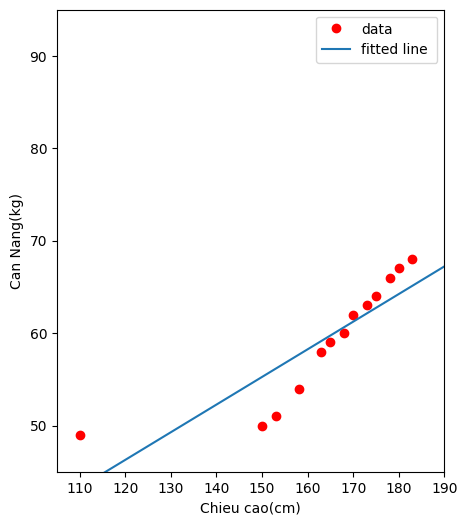

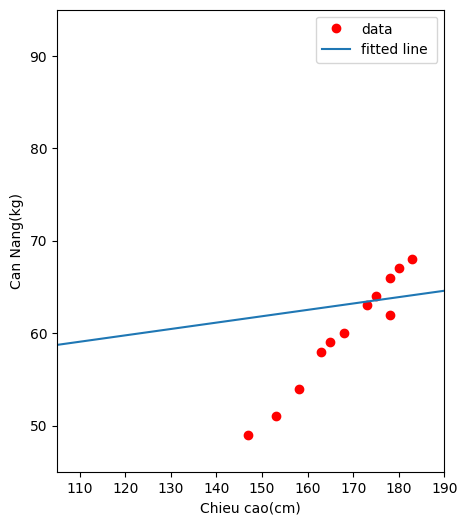

In [9]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 2)
fit_linear_regression_and_visualize(df_ex,input_col="height_2",label_col="weight")

plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 3)
fit_linear_regression_and_visualize(df_ex,input_col="height",label_col="weight_2")

Phần 2. Data Pre-processing

# Kiểm tra các giá trị bị thiếu (Checking for Missing Values)

In [12]:

df = pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [14]:
kt_data = df.isna()
kt_data

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


  Xử lý các giá trị bị thiếu (Handling the Missing Values) 
  

In [23]:
''' SimpleImputer là một class của Sklearn hỗ
trợ xử lý các missing data là số và thay chúng
là một giá trị trung bình của cột, tần suất của
dữ liệu suất hiện nhiều nhất'''

from sklearn.impute import SimpleImputer

cols_to_impute = ['Age', 'Salary']

# chuyen cac gia tri bi thieu thanh gia tri trung binh
imputer = SimpleImputer(strategy='median')

# dien gia tri trung vao nhung gia tri bi thieu
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])


In [55]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,59500.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [43]:
x= df.iloc[:, :-1].values #lấy tất cả hàng còn cột bỏ cột cuối
y = df.iloc[:, -1].values # lấy tất cà hàng và chỉ lấy cột cuố

Chuyển đổi và mã hóa dữ liệu (Chuyển đổi các biến Categorical thành dạng số 
(nếu cần thiết) bằng mã hóa one-hot encoding hoặc mã hóa số học) 

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])],remainder="passthrough")

x= np.array(ct.fit_transform(x))
x

array([[0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 0.0, 40.0, 59500.0],
       [0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 0.0, 1.0, 39.0, 52000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 0.0, 1.0, 0.0, 50.0, 59500.0],
       [1.0, 0.0, 0.0, 0.0, 39.0, 52000.0]], dtype=object)

In [38]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

Thực hiện chia tập dữ liệu (Train, test) 

In [48]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
#X_train gồm 80% dữ liệu x - y_train nhãn tương ứng
#X_test gồm 20% dữ liệu x - y_test nhãn tương ứng

 Chuẩn hóa dữ liệu (z-score, Min-Max Scaling). 
 
 


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
#only use Transform to use the SAME scaler as the Training Set
X_test[:,3:] = sc.transform(X_test[:,3:])

In [52]:
X_train

array([[0.0, 0.0, 1.0, -0.7071067811865476, 1.6485108248654277,
        1.9304743589541409],
       [0.0, 1.0, 0.0, -0.7071067811865476, -0.49138303433488706,
        -0.23589337553304962],
       [0.0, 0.0, 1.0, -0.7071067811865476, -1.2046809874016589,
        -0.5825122130510002],
       [0.0, 0.0, 0.0, 1.4142135623730951, -1.6326597592417216,
        -1.1024404693279257],
       [1.0, 0.0, 0.0, -0.7071067811865476, 0.07925532811853019,
        -0.7558216318099754],
       [0.0, 0.0, 1.0, -0.7071067811865476, 0.2219149187318845,
        -0.1059113114638182],
       [0.0, 1.0, 0.0, -0.7071067811865476, 1.363191643638719,
        1.5838555214361905],
       [0.0, 0.0, 0.0, 1.4142135623730951, -0.06340426249482414,
        0.024070752605413224],
       [0.0, 0.0, 0.0, 1.4142135623730951, 0.07925532811853019,
        -0.7558216318099754]], dtype=object)

In [61]:
#CHUAN HOA MAX MIN
from sklearn import preprocessing as pp

mms = pp.MinMaxScaler()
data = df.iloc[:,1:3].values
data_mms = mms.fit_transform(data)

print(data_mms)

[[0.73913043 0.68571429]
 [0.         0.        ]
 [0.13043478 0.17142857]
 [0.47826087 0.37142857]
 [0.56521739 0.32857143]
 [0.34782609 0.28571429]
 [0.52173913 0.11428571]
 [0.91304348 0.88571429]
 [1.         1.        ]
 [0.43478261 0.54285714]
 [1.         0.32857143]
 [0.52173913 0.11428571]]
